In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
df = pd.read_csv("df23fin.csv")

In [3]:
#only Dublin subset
dub = df[(df['Latitude'] >= 53.2595) & (df['Latitude'] <= 53.4135) &
                 (df['Longitude'] >= -6.40) & (df['Longitude'] <= -6.04)]

In [4]:
#select only numerical columns for clustering
dub_clust = dub[['Latitude', 'Longitude', 'Price']]

/var/folders/jd/xt720m1547g5zz02b9btm1ww0000gn/T/ipykernel_6031/3034109594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dub_clust["Cluster"] = cluster_labels


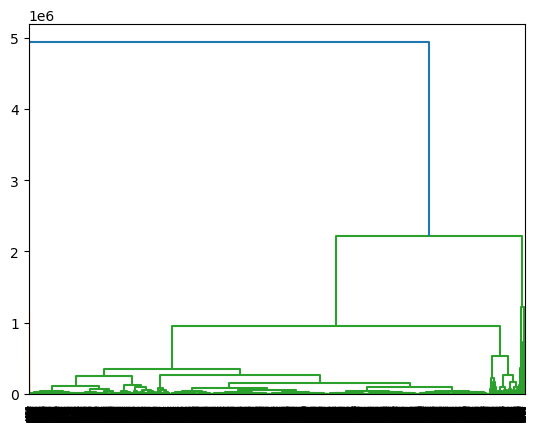

In [6]:
clustering = linkage(dub_clust, method="average", metric="euclidean")
dendrogram(clustering)
cluster_labels = cut_tree(clustering, n_clusters=15).reshape(-1, )
dub_clust["Cluster"] = cluster_labels

In [10]:
type(cluster_labels)

numpy.ndarray

<Axes: xlabel='Cluster', ylabel='Price'>

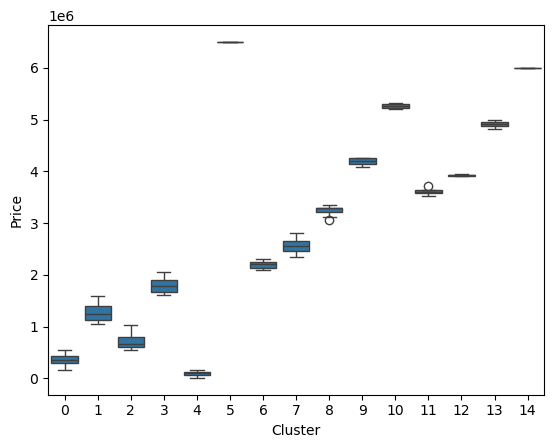

In [7]:
sns.boxplot(x='Cluster', y='Price', data=dub_clust)

In [8]:
dub_clust['Cluster'].value_counts()

Cluster
0     3616
2     1446
1      244
4      142
3       88
7       26
6       22
8        8
9        4
11       4
10       2
12       2
13       2
5        1
14       1
Name: count, dtype: int64

In [11]:
dub["Cluster"] = dub_clust[["Cluster"]]
dub["Locality"] = dub["Address"].str[-9:]

/var/folders/jd/xt720m1547g5zz02b9btm1ww0000gn/T/ipykernel_6031/2370460156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dub["Cluster"] = dub_clust[["Cluster"]]
/var/folders/jd/xt720m1547g5zz02b9btm1ww0000gn/T/ipykernel_6031/2370460156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dub["Locality"] = dub["Address"].str[-9:]


In [12]:
dub["Locality"].value_counts()[:50]

Locality
 DUBLIN 9    284
 DUBLIN 8    281
DUBLIN 12    263
 DUBLIN 7    262
 DUBLIN 4    232
DUBLIN 15    226
DUBLIN 14    217
 DUBLIN 5    213
 DUBLIN 6    212
DUBLIN 11    208
 DUBLIN 3    204
DUBLIN 16    174
DUBLIN 24    165
DUBLIN 13    152
 DUBLIN 1    118
DUBLIN 18    117
d, Dalkey    102
DUBLIN 6W     90
 DUBLIN 2     84
N, DUBLIN     78
K, DUBLIN     73
LAOGHAIRE     70
DUBLIN 22     70
BLACKROCK     68
E, DUBLIN     65
DUBLIN 20     60
DUBLIN 10     55
Y, DUBLIN     51
CO DUBLIN     47
1, DUBLIN     41
7, DUBLIN     41
DUBLIN 17     40
8, DUBLIN     37
2, DUBLIN     34
, Ashtown     33
t Merrion     30
 TALLAGHT     29
4, DUBLIN     27
hurchtown     26
RUMCONDRA     24
THFARNHAM     23
3, DUBLIN     23
T, DUBLIN     20
TOWN ROAD     19
STLEKNOCK     18
, ASHTOWN     18
BLIN CITY     18
5, DUBLIN     17
SANDYFORD     17
rtmarnock     16
Name: count, dtype: int64

In [ ]:
#only Dublin
plt.figure(figsize=(10, 7))
plt.scatter(dub_clust['Longitude'], dub_clust['Latitude'], c=dub_clust['Cluster'], cmap='inferno', s=15)
plt.colorbar().set_label('Geographical Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Clustering of Specific Price regions in Dublin')
plt.grid(False)
plt.show()